# Pandas: grouping

In [146]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [136]:
cars = pd.read_csv("data/vehicles.csv")

In [161]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,co2pergram,decade,city_km_l
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,522.764706,80s,7.652592
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,683.615385,80s,5.526872
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,555.437500,80s,6.802304
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,683.615385,80s,5.526872
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,555.437500,80s,5.952016


How many Car models? 

In [138]:
### your code is here
len(cars.groupby(['Model']).size())

3608

group by the data by the Make  using count function

In [139]:
### your code us here

cars.groupby(['Make']).count()

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,4,4,4,4,4,4,4,4,4,4,4,4,4,4
ASC Incorporated,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Acura,302,302,302,302,302,302,302,302,302,302,302,302,302,302
Alfa Romeo,41,41,41,41,41,41,41,41,41,41,41,41,41,41
American Motors Corporation,22,22,22,22,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
Volvo,717,717,717,717,717,717,717,717,717,717,717,717,717,717
Wallace Environmental,32,32,32,32,32,32,32,32,32,32,32,32,32,32


What brand has the most cars?

In [140]:
### your code us here
cars.groupby(['Make']).count().sort_values(by=["Model"], ascending=False).index[0]

'Chevrolet'

<b>show the average CO2_Emission_Grams/Km  by Brand

<AxesSubplot:>

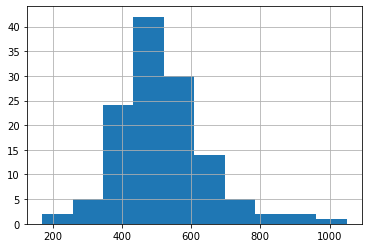

In [141]:
cars['CO2 Emission Grams/Mile']
cars['co2pergram'] = cars['CO2 Emission Grams/Mile'].apply(lambda x: x*1,60934)

cars.groupby(['Make']).mean()['co2pergram'].hist()

<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

In [142]:
### your code us here
cars.groupby(['Make']).mean()['co2pergram'].sort_values()

Make
Fisker                                 169.000000
smart                                  247.030556
Fiat                                   304.666560
Daihatsu                               310.188060
MINI                                   313.716862
                                         ...     
Laforza Automobile Inc                 807.909091
Bugatti                                873.062500
Superior Coaches Div E.p. Dutton       888.700000
S and S Coach Company  E.p. Dutton     888.700000
Vector                                1049.159722
Name: co2pergram, Length: 127, dtype: float64

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [143]:
cars['Year'].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: Year, dtype: float64

<AxesSubplot:>

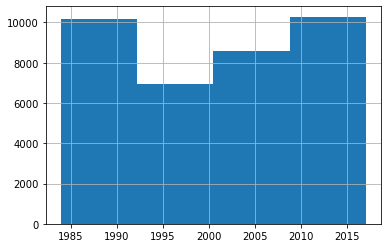

In [153]:
## your code here

cars['decade'] = pd.cut(cars['Year'], bins = 4, labels = ['80s', '90s', '2000s', '2010'])


cars['Year'].hist(bins=4)

<AxesSubplot:>

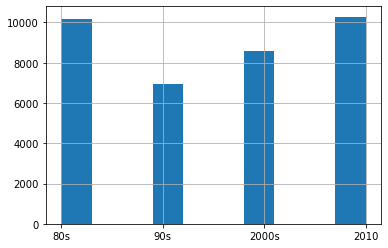

In [154]:
cars['decade'].hist()

### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

In [160]:
### your code is here

cars['city_km_l'] = cars['City MPG']*(0.425144)

cars.groupby(['decade'])['city_km_l'].mean()


decade
80s      7.306113
90s      7.221445
2000s    7.122191
2010     8.202112
Name: city_km_l, dtype: float64

No, the gas consumtion of cars has risen in the last decade

Which brands are more environment friendly?

In [167]:
### your code is here

cars.groupby(['Make'])['co2pergram'].mean().sort_values(ascending=False).head(10)

Make
Vector                                1049.159722
Superior Coaches Div E.p. Dutton       888.700000
S and S Coach Company  E.p. Dutton     888.700000
Bugatti                                873.062500
Laforza Automobile Inc                 807.909091
Rolls-Royce                            765.076650
Lamborghini                            754.782498
Texas Coach Company                    740.583333
Maybach                                729.557279
Ferrari                                712.636348
Name: co2pergram, dtype: float64

Does the drivetrain affect fuel consumption?

In [171]:
## Your Code here

cars.groupby(['Drivetrain'])['Combined MPG'].mean().sort_values()

Drivetrain
Part-time 4-Wheel Drive       16.272152
4-Wheel or All-Wheel Drive    16.744733
2-Wheel Drive                 17.009456
Rear-Wheel Drive              17.526481
4-Wheel Drive                 19.077505
All-Wheel Drive               20.930358
Front-Wheel Drive             23.912220
2-Wheel Drive, Front          28.000000
Name: Combined MPG, dtype: float64

In [ ]:
On average the 2-Wheel drive needs the most Gas.

Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [ ]:
## Your Code here

Use `groupby` and `aggregate` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [ ]:
## your code is here

aggregate with average City_Km/Liter and the minimum of the Trans

In [ ]:
### your code is here